100%|██████████| 2000/2000 [00:00<00:00, 2313.48it/s]


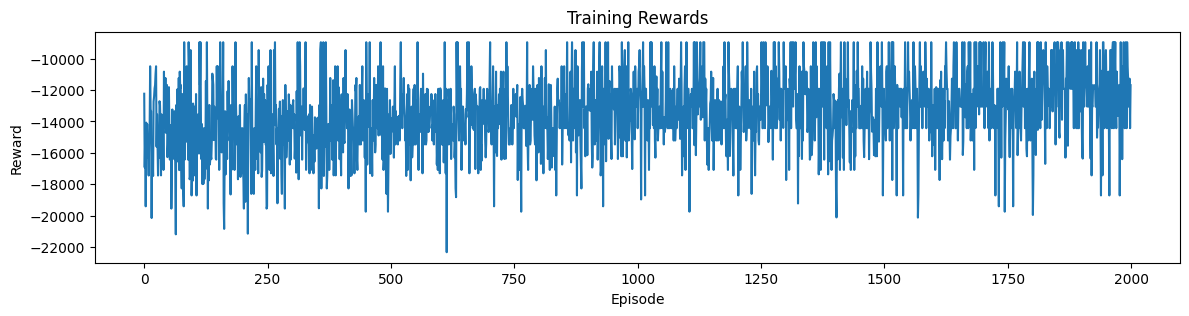

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class TSPQAgent(object):#define the TSP agent
    def __init__(self, n_cities, learning_rate = 0.01, discount_factor=0.99, epsilon=0.1): #defining parameters
        self.n_cities = n_cities
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q = np.zeros((n_cities, n_cities))

    def select_action(self, state, env):# Defining the action of the agent
        unvisited_cities = np.where(env.visited == False)[0]
        if np.random.uniform() < self.epsilon:
            # Select a random unvisited city
            return np.random.choice(unvisited_cities)
        else:
            # Select the unvisited city with the highest Q-value
            q_values = self.Q[state, unvisited_cities]
            return unvisited_cities[np.argmax(q_values)]

    def update(self, state, action, reward, new_state): # Define a functin to update the visited and unvisited cities
        current_value = self.Q[state, action]
        max_next_value = np.max(self.Q[new_state])
                                      #Defining Q-learning rule as follow
        new_value = current_value + self.learning_rate * (reward + self.discount_factor * max_next_value - current_value)
        self.Q[state, action] = new_value

        #plotting training reward

    def plot_training_rewards(self, rewards): 
        plt.figure(figsize=(14, 3))
        plt.plot(rewards)
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.title('Training Rewards')
        plt.show()

 #Defining Travelling salesman environment
class TSPEnvironment(object):
    def __init__(self, distances): 
        self.distances = distances
        self.n_cities = distances.shape[0]
        self._generate_cities()
        self.reset()

    def reset(self): #resets the environment
        self.visited = np.zeros(self.n_cities, dtype=bool) # all cities as unvisited
        first_city = np.random.randint(self.n_cities) 
        self.visited[first_city] = True 
        self.current_city = first_city  
        return first_city  # returns the index of the first city.

    def step(self, next_city):
        state = self.current_city #updates the state
        self.current_city = next_city # updates current city 
        self.visited[next_city] = True # updates visited status 
        #calculates the reward as the negative distance between the current city and the next city
        reward = -self.distances[state, next_city] 
        done = np.all(self.visited)
        if done:
            self.reset()
        return next_city, reward, done

    def _generate_cities(self): # generating random cities
        np.random.seed(0) 
        self.x = np.random.rand(self.n_cities)
        self.y = np.random.rand(self.n_cities)

    def render(self): #Plotting the cities and distance between them graph 
        plt.figure(figsize=(10, 8))
        plt.scatter(self.x, self.y, color='blue', label='stops')

        for i in range(self.n_cities):
            for j in range(i + 1, self.n_cities):
                #Label the edges
                distance = self.distances[i, j]
                label = f'{distance:.2f}'  
                x_mid = (self.x[i] + self.x[j]) / 2.05
                y_mid = (self.y[i] + self.y[j]) / 2
                plt.text(x_mid, y_mid, label, color='blue', fontsize=10, ha='center')

                plt.plot([self.x[i], self.x[j]], [self.y[i], self.y[j]], color='gray', linestyle='dotted')
         #initial city is 0
        visited_x = self.x[0]
        visited_y = self.y[0]
        plt.scatter(visited_x, visited_y, color='r', label='Visited Cities')
        #Label cities
        for i, (x, y) in enumerate(zip(self.x, self.y)):
            plt.annotate(f'{i}', (x, y), textcoords="offset points", weight='bold', xytext=(0, 10), ha='center')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Travel salesman Environment')
        plt.legend()
        plt.show()


# distance_matrix represent the distance between the cities

distances = np.array([[0, 3299, 4772.8, 2803, 8276.6, 6299],
                      [3299, 0, 918, 2852, 2701, 2201],
                      [4772.8, 918, 0, 1016, 3098.16, 2238.4],
                      [2803, 2852, 1016, 0, 3981, 3236],
                      [8276.6, 2701, 3098.16, 3981, 0, 2020],
                      [6299, 2201, 2238.4, 3236, 2020, 0]])

env = TSPEnvironment(distances)
agent = TSPQAgent(env.n_cities)

n_episodes = 2000         #number of iteration to train the agent.
rewards = []
for episode in tqdm(range(n_episodes)):
    state = env.reset()
    episode_reward = 0
    done = False
    while not done:
        action = agent.select_action(state, env) #The agent selects an action based on the current state and the environment.
        new_state, reward, done = env.step(action) #New state, new action and new reward
         #The agent updates its internal state based on the observed state, action, reward, and new state.
        agent.update(state, action, reward, new_state)
        state = new_state
        episode_reward += reward
    rewards.append(episode_reward) # rewards obtained in each episode are stored in the rewards

agent.plot_training_rewards(rewards)

start_city = env.reset()
predicted_path = [start_city]
done = False

while not done:
    action = agent.select_action(start_city, env) #he agent selects an action based on the starting city and the environment.

    if action is not None: #all cities have been visited
        next_city, _, done = env.step(action)
        predicted_path.append(next_city)
        start_city = next_city
    else:
        next_city, _, done = env.step(np.random.choice(np.where(env.visited == False)[0]))
        predicted_path.append(next_city)
        start_city = next_city

# Reorder the predicted path to start from the first city and end to the first city (Hamiltonian cycle)
if predicted_path[0] != 0:
    idx = predicted_path.index(0)
    predicted_path = predicted_path[idx:] + predicted_path[:idx+1]


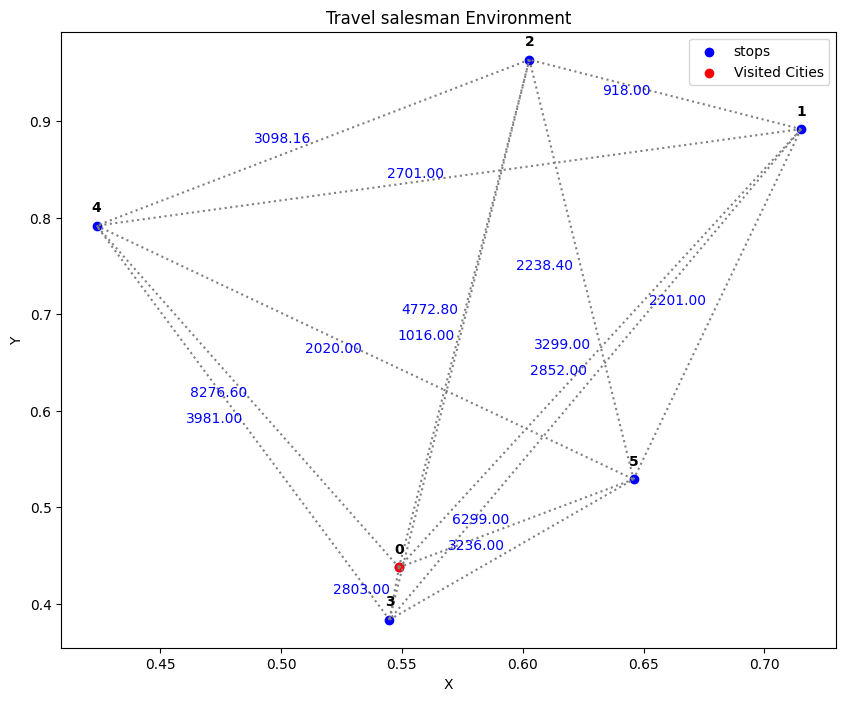

In [19]:
env.render()

Agent's Predicted Path: [0, 3, 2, 1, 5, 4, 0]



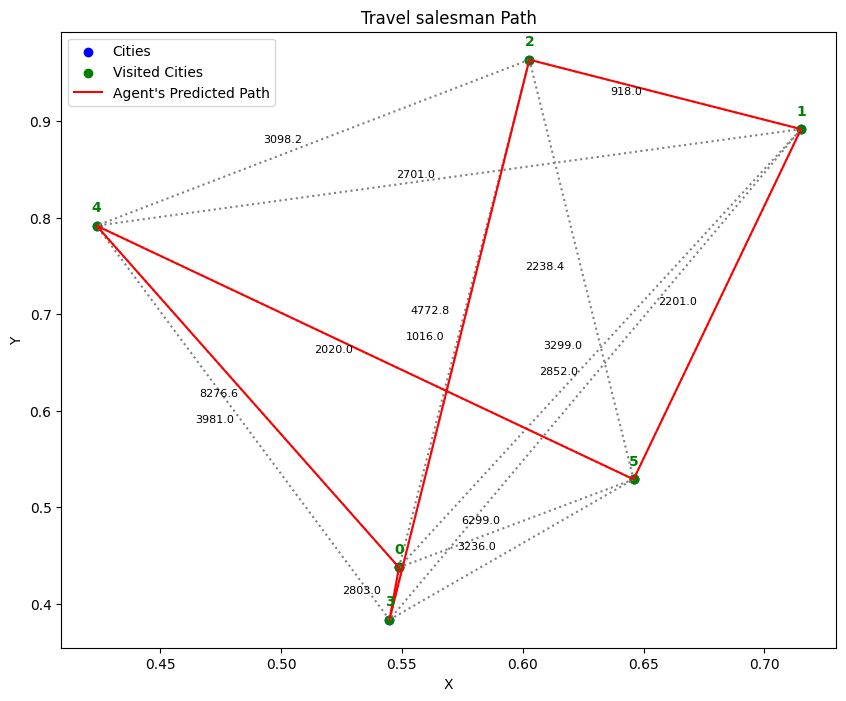

In [9]:

# Let's show the predicted path
print("Agent's Predicted Path:", predicted_path)
print()

# Plotting the predicted path
plt.figure(figsize=(10, 8))
plt.scatter(env.x, env.y, color='blue', label='Cities')

for i in range(env.n_cities):
    for j in range(i + 1, env.n_cities):
        distance = env.distances[i, j]
        label = f'{distance:.1f}'  # Format distance as a string with 1 decimal places
        x_mid = (env.x[i] + env.x[j]) / 2.05
        y_mid = (env.y[i] + env.y[j]) / 2
        plt.text(x_mid , y_mid , label, color='black', fontsize=8, ha='center')

        plt.plot([env.x[i], env.x[j]], [env.y[i], env.y[j]], color='gray', linestyle='dotted')

visited_x = env.x[env.visited]
visited_y = env.y[env.visited]
plt.scatter(visited_x, visited_y, color='green', label='Visited Cities')

for i, (x, y) in enumerate(zip(env.x, env.y)):
    plt.annotate(f'{i}', (x, y), textcoords="offset points",weight='bold', xytext=(0, 10), ha='center', color='green')

# Plotting the agent's predicted path
path_x = env.x[predicted_path]
path_y = env.y[predicted_path]
plt.plot(path_x, path_y, color='red', label="Agent's Predicted Path")
plt.scatter(path_x, path_y, color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Travel salesman Path')
plt.legend()
plt.show()